In [241]:
import radburst.utils.utils as utils
from radburst.utils.dataset import Dataset

# Define the path to the data folder
data_path = '/mnt/c/Users/camer/OneDrive/Documents/radburst/data/sample_data'

# Create a Dataset object which loads all data from the given path (defined in dataset.py)
data = Dataset(data_dir= data_path)
data.preprocess(standardize_rows = True, remove_vertical_lines = True)
sample = data[1].copy()


Loaded 4 files from /mnt/c/Users/camer/OneDrive/Documents/radburst/data/sample_data


In [242]:
sample

array([[ 0.91078785,  2.26792205,  0.91078785, ...,  0.91078785,
        -3.16061477, -1.80348057],
       [ 2.35429869, -0.32738942,  1.01345463, ..., -0.32738942,
        -0.32738942, -1.66823348],
       [ 0.13636261,  0.13636261,  1.49621138, ...,  0.13636261,
         0.13636261,  0.13636261],
       ...,
       [ 0.66268163,  0.66268163,  0.66268163, ..., -0.82370707,
         0.66268163,  0.66268163],
       [-0.65945628,  0.84310233,  0.84310233, ..., -0.65945628,
         0.84310233, -0.65945628],
       [-0.68481848, -0.68481848,  0.83982378, ...,  0.83982378,
        -0.68481848,  0.83982378]])

In [243]:
len(data)

4

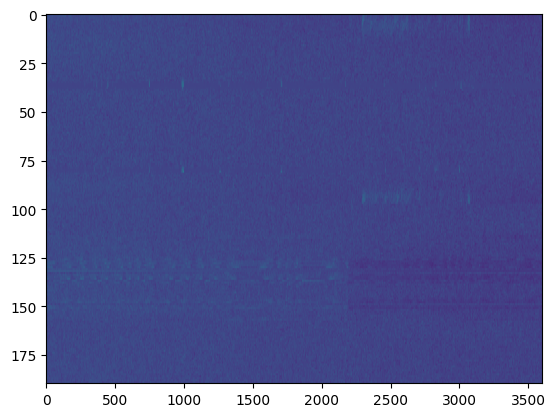

In [244]:
utils.plot_spectrogram(sample)

17.655656592704133 -4.6167033491759515


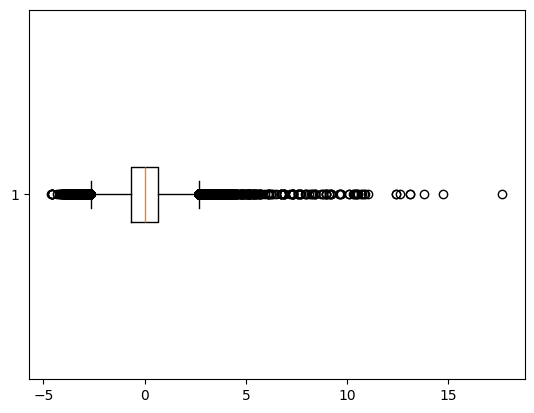

In [245]:
import matplotlib.pyplot as plt
import numpy as np

plt.boxplot(sample.flatten(), vert=False)  # Set vert=False for horizontal box plot

print(sample.max(), sample.min())

106.02900135778346

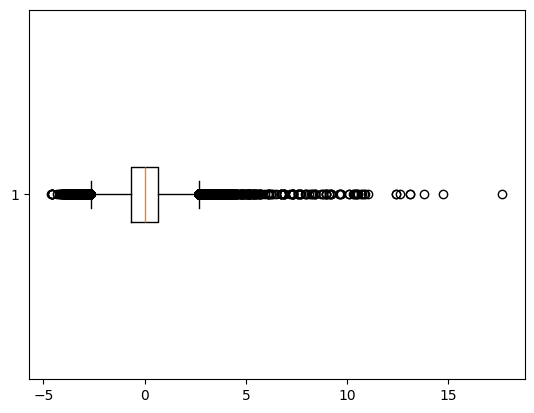

In [246]:

# Define the clipping range
min_value = -1  # Minimum threshold
max_value = 3  # Maximum threshold

# Clip the array to the defined range
    # may not be necessary
#sample = np.clip(sample, min_value, max_value)
plt.boxplot(sample.flatten(), vert=False)  # Set vert=False for horizontal box plot


def softmax(x):
    # Subtract the maximum value for numerical stability
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)


# expected frequency (row index for now)
first_col = sample[:,0]
smax_col = softmax(first_col)

# frequencies (index for now)
index = np.arange(0,190)

expected_index = np.sum(smax_col * index)
expected_index

In [247]:
expected_vals = []
variances = []
intensities = []

for i in range(sample.shape[1]):
    col = sample[:,i]
    smax_vals = softmax(col)
    ex_val = np.sum(smax_vals* index)
    expected_vals.append(ex_val)
    
    expected_value_squared = np.sum((index ** 2) * smax_vals)
    variance = expected_value_squared - (ex_val ** 2)
    
    intensity = np.sum(col)
    
    intensities.append(intensity)

    variances.append(variance/intensity)
    #variances.append(variance)


len(expected_vals)
len(variances)

3600

In [248]:
def norm(arr):
    return (arr - np.min(arr)) / (np.max(arr) - np.min(arr))

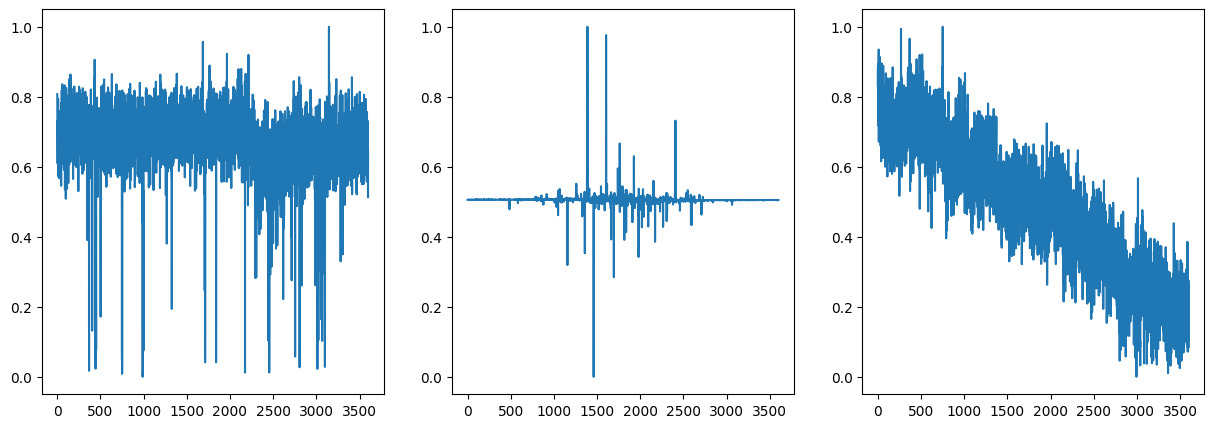

In [249]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5))

ax[0].plot(norm(expected_vals))
ax[1].plot(norm(variances))
ax[2].plot(norm(intensities))
plt.show()

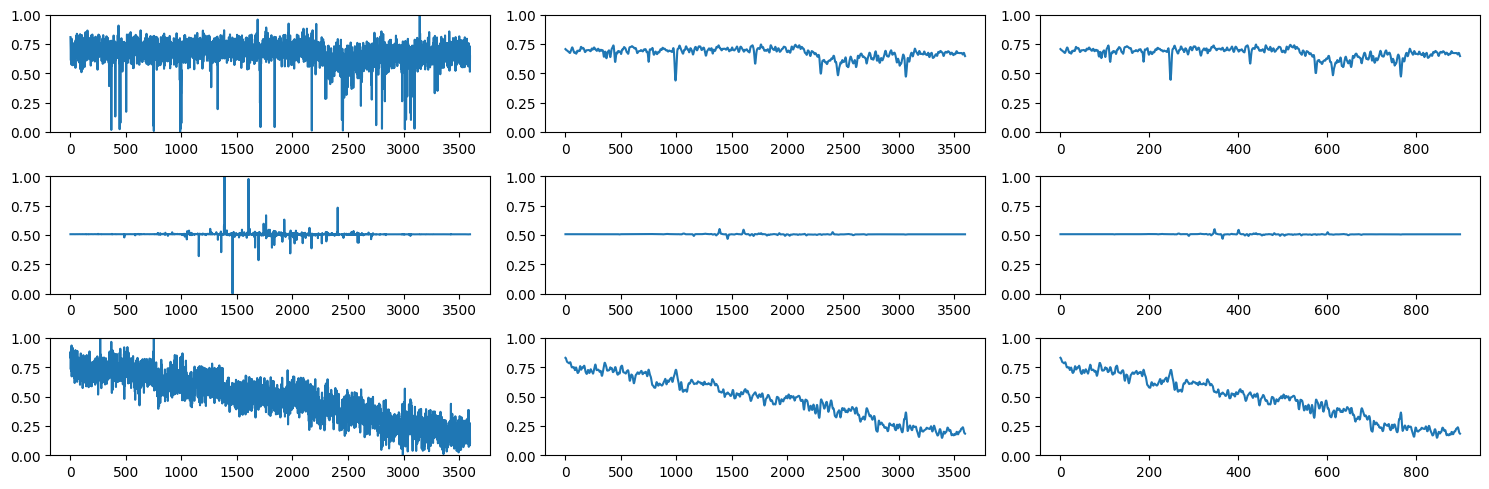

In [250]:
from scipy.ndimage import gaussian_filter1d
a = norm(expected_vals)
b = norm(variances)
c = norm(intensities)

# Apply Gaussian blur with a sigma value
sigma = 5  # Standard deviation for Gaussian kernel
a_s = gaussian_filter1d(a, sigma=sigma)
b_s = gaussian_filter1d(b, sigma=sigma)
c_s = gaussian_filter1d(c, sigma=sigma)


# Define new indices for interpolation
original_indices = np.arange(len(a))
new_indices = np.linspace(0, len(a) - 1, 900)  # New indices for resizing

ar = np.interp(new_indices, original_indices, a_s)
br = np.interp(new_indices, original_indices, b_s)
cr = np.interp(new_indices, original_indices, c_s)

fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (15,5))

ax[0, 0].plot(a)
ax[0, 1].plot(a_s)
ax[0, 2].plot(ar)


ax[1, 0].plot(b)
ax[1, 1].plot(b_s)
ax[1, 2].plot(br)


ax[2, 0].plot(c)
ax[2, 1].plot(c_s)
ax[2, 2].plot(cr)

for i in range(3):
    for j in range(3):
        ax[i, j].set_ylim(0, 1)

plt.tight_layout()
plt.show()

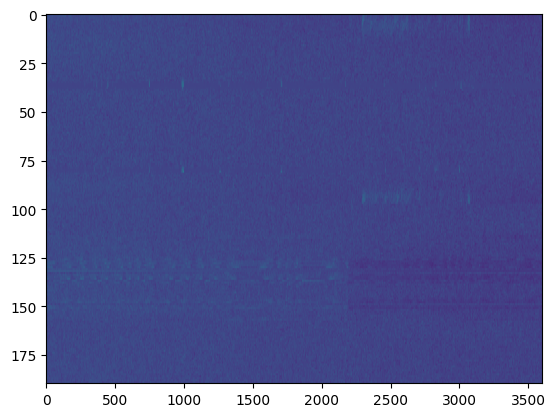

In [251]:
utils.plot_spectrogram(sample)

In [210]:
# maybe variance is not needed